## Redes Neurais Artificiais 2025.1

- **Disciplina**: Redes Neurais Artificiais 2025.1  
- **Professora**: Elloá B. Guedes (ebgcosta@uea.edu.br)  
- **Github**: http://github.com/elloa  

### Explorando uma base de dados

Rodolfo Simões Makarem, Caio Bertoldo, Diogo Gomes, Danilo Jorge, Leonardo Abinader, Guilherme Montenegro

Nesta atividade prática iremos explorar a seguinte base de dados **_Air Quality and Pollution Assessment._**


## Etapa 1: Coleta e preparação de dados.

In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Carregar os dados
df = pd.read_csv("updated_pollution_dataset.csv")

# Verificar valores ausentes
print("Valores ausentes por coluna:\n")
print(df.isnull().sum())

# Codificar a variável alvo 'Air Quality'
label_encoder = LabelEncoder()
df['Air Quality Encoded'] = label_encoder.fit_transform(df['Air Quality'])

# Exibir o mapeamento dos rótulos
print("\nMapeamento da variável alvo:")
for i, label in enumerate(label_encoder.classes_):
    print(f"{label} -> {i}")

# Normalizar os dados numéricos
features_to_scale = df.drop(columns=['Air Quality', 'Air Quality Encoded']).columns

scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[features_to_scale] = scaler.fit_transform(df_scaled[features_to_scale])

# Visualizar as primeiras linhas do dataset preparado
print("\nPrimeiras linhas do dataset normalizado e codificado:")
print(df_scaled.head())

Valores ausentes por coluna:

Temperature                      0
Humidity                         0
PM2.5                            0
PM10                             0
NO2                              0
SO2                              0
CO                               0
Proximity_to_Industrial_Areas    0
Population_Density               0
Air Quality                      0
dtype: int64

Mapeamento da variável alvo:
Good -> 0
Hazardous -> 1
Moderate -> 2
Poor -> 3

Primeiras linhas do dataset normalizado e codificado:
   Temperature  Humidity     PM2.5      PM10       NO2       SO2        CO  \
0    -0.034080 -0.690715 -0.608589 -0.450455 -0.844581 -0.120721  0.402303   
1    -0.257295  0.349507 -0.726706 -0.658892  0.493329 -0.046643  0.255775   
2    -1.031106  0.292768  0.267100  0.130973 -0.226219  0.383011  0.237459   
3    -0.435867 -1.951591 -0.571933 -0.874642 -1.451700 -0.698530 -0.641707   
4    -0.525153  0.040593 -0.539349 -0.519934 -0.507293 -0.654083 -0.898130   

   P

## Etapa 2: Análise exploratória da base de dados.

Distribuição da variável alvo (Air Quality):
Air Quality
Good         2000
Moderate     1500
Poor         1000
Hazardous     500
Name: count, dtype: int64


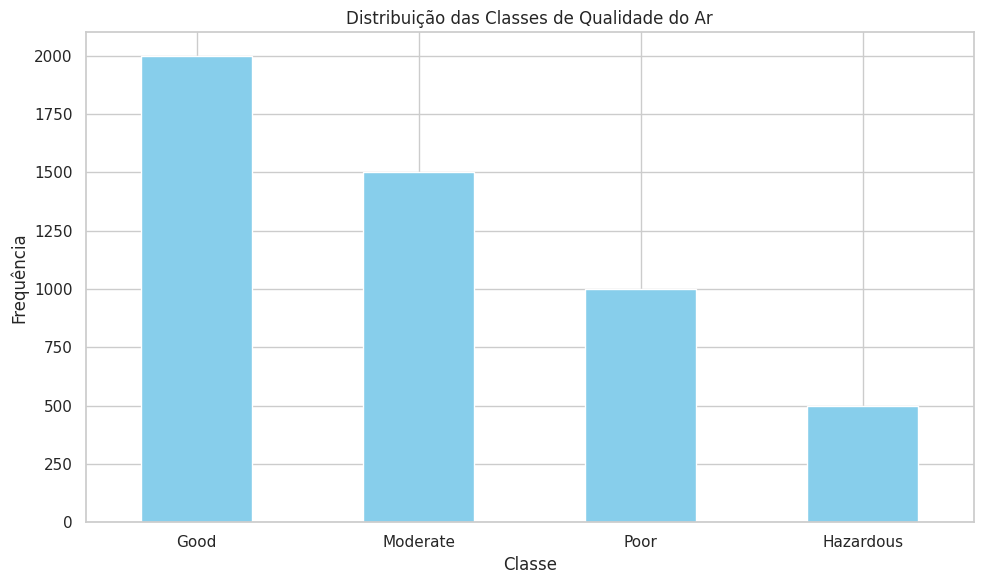

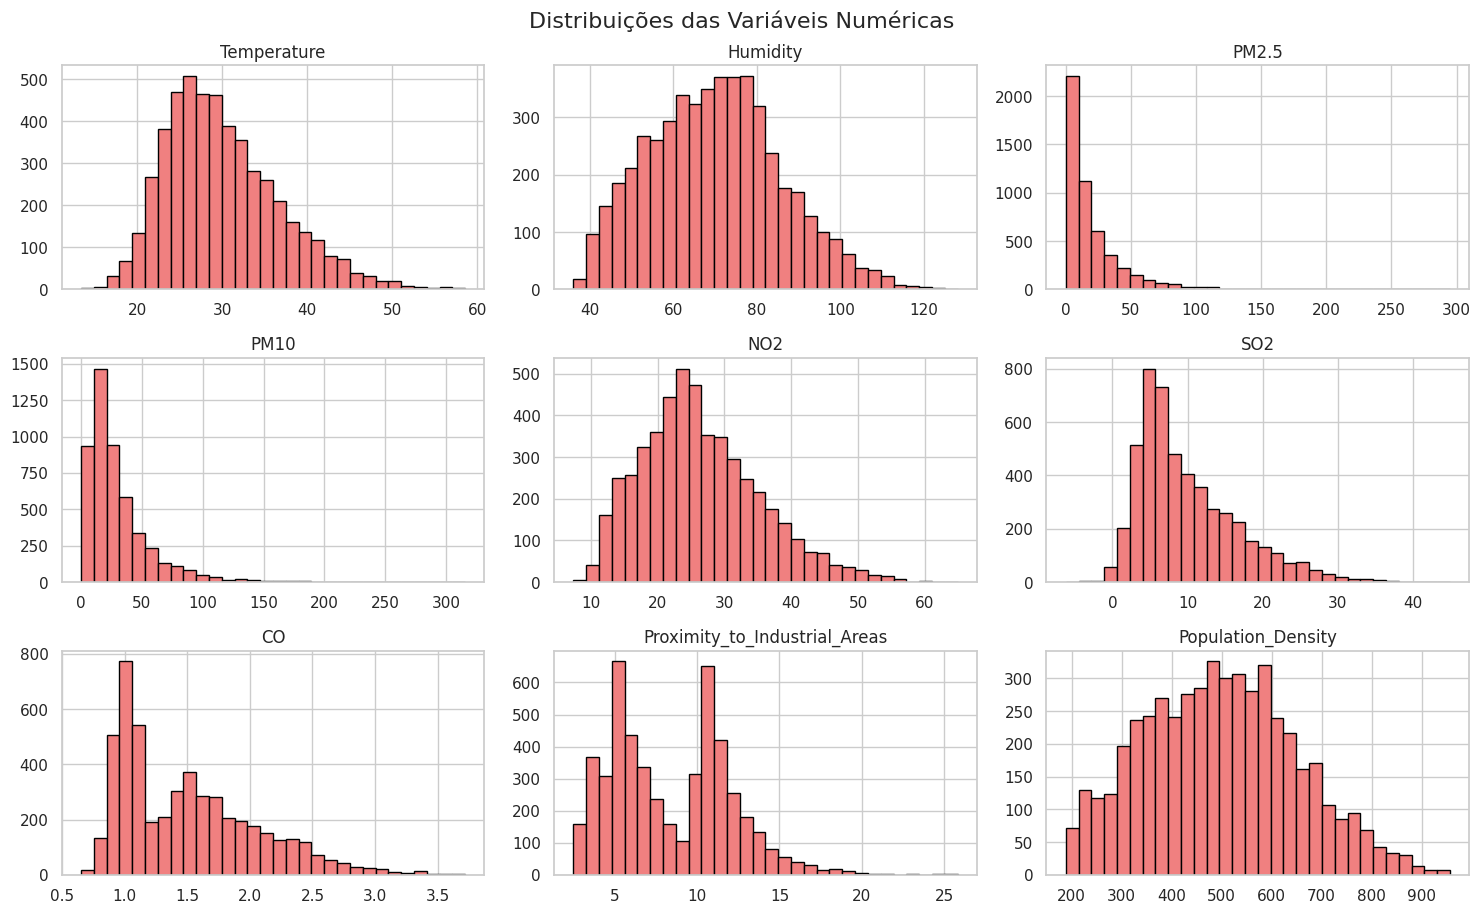

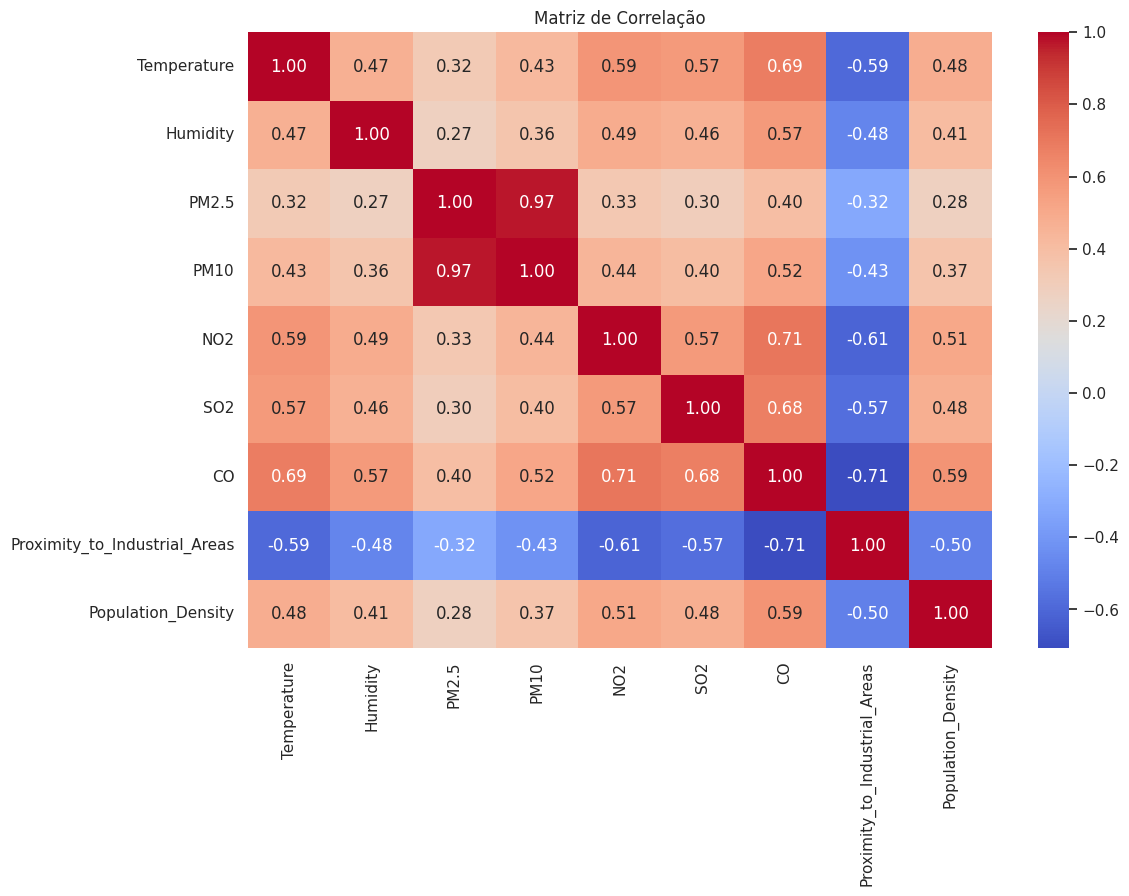

<ipython-input-5-2e63ae25d9b8>:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Air Quality', y=col, data=df, ax=axes[i], palette='Set2')
<ipython-input-5-2e63ae25d9b8>:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Air Quality', y=col, data=df, ax=axes[i], palette='Set2')
<ipython-input-5-2e63ae25d9b8>:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Air Quality', y=col, data=df, ax=axes[i], palette='Set2')
<ipython-input-5-2e63ae25d9b8>:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be r

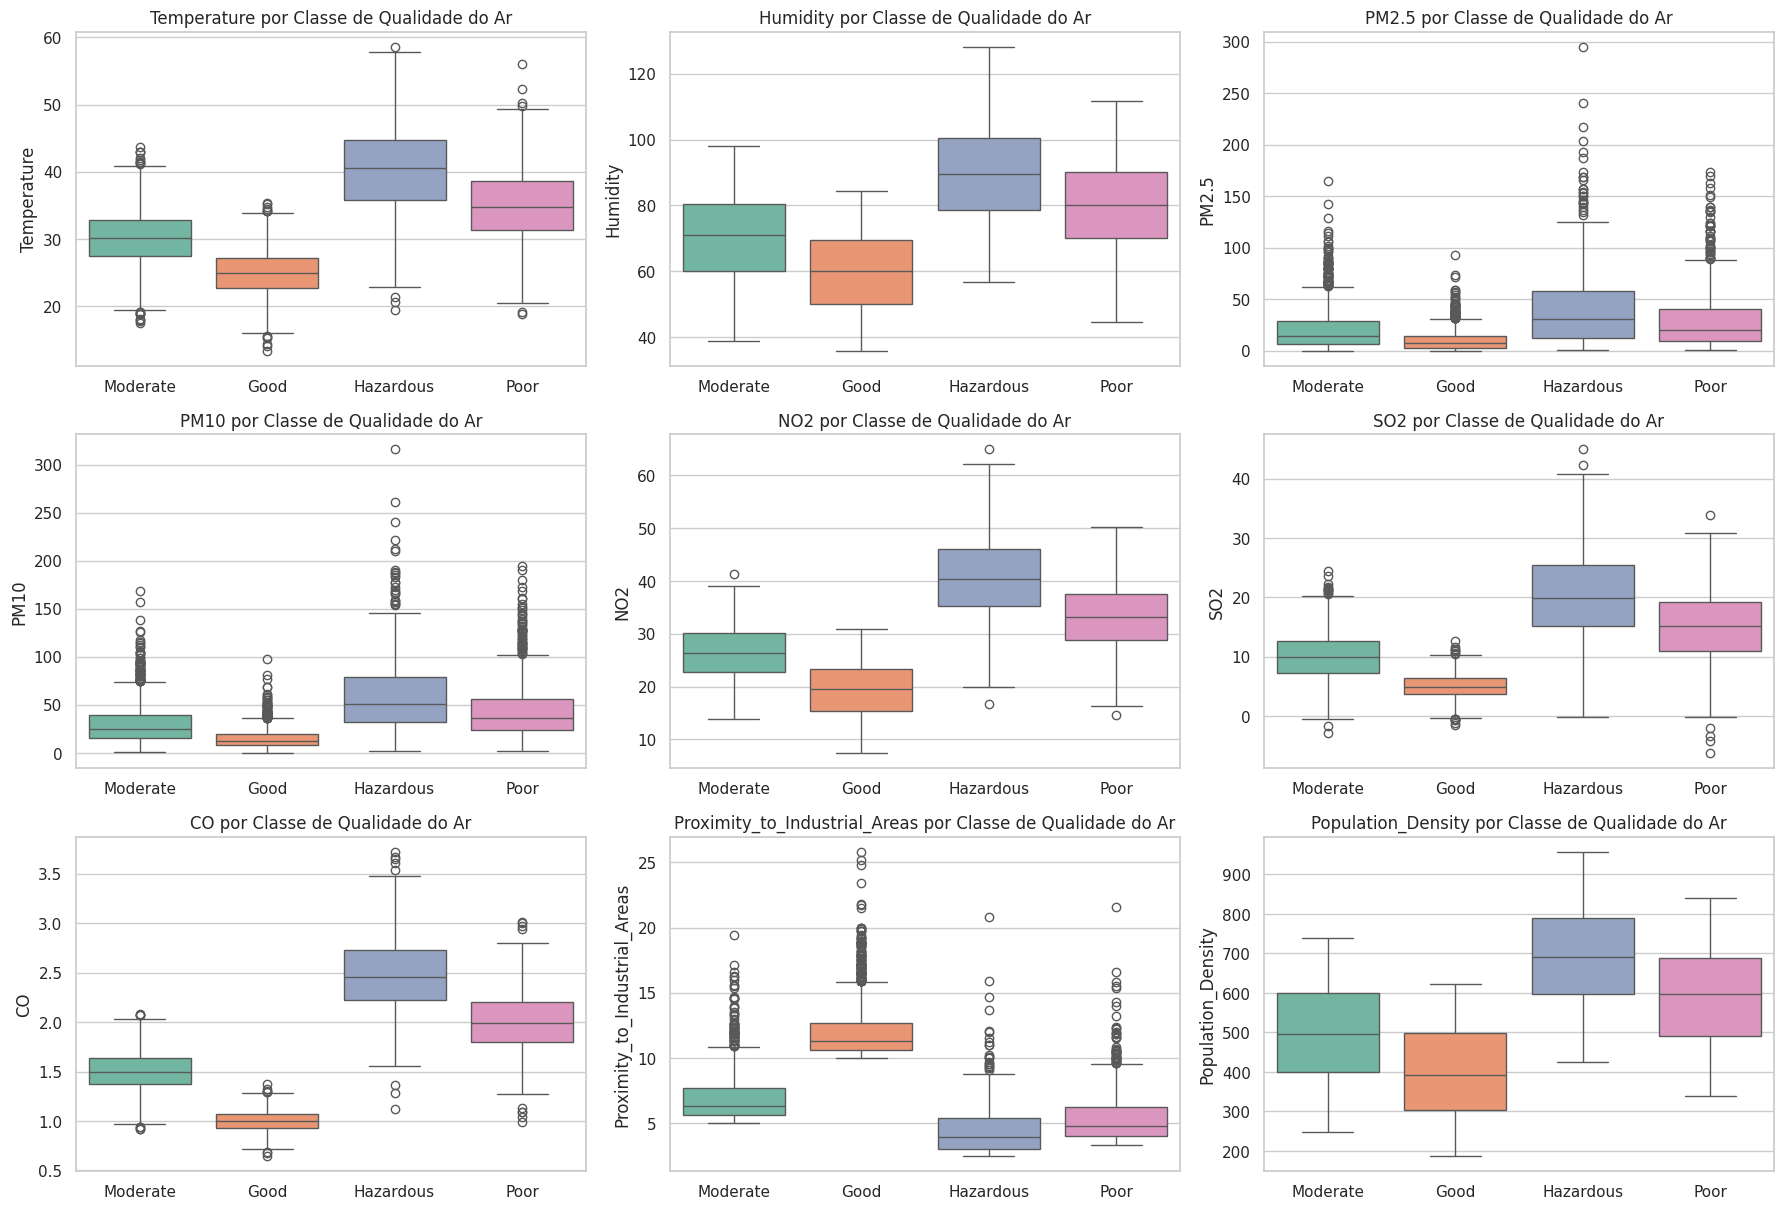

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar os dados
df = pd.read_csv("updated_pollution_dataset.csv")

# Configuração visual
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

# Ver distribuição da variável alvo
print("Distribuição da variável alvo (Air Quality):")
print(df['Air Quality'].value_counts())

df['Air Quality'].value_counts().plot(kind='bar', color='skyblue')
plt.title("Distribuição das Classes de Qualidade do Ar")
plt.xlabel("Classe")
plt.ylabel("Frequência")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Histogramas das variáveis numéricas
numeric_cols = df.select_dtypes(include='number').columns

df[numeric_cols].hist(bins=30, figsize=(15, 12), layout=(4, 3), color='lightcoral', edgecolor='black')
plt.suptitle("Distribuições das Variáveis Numéricas", fontsize=16)
plt.tight_layout()
plt.show()

# Matriz de correlação
plt.figure(figsize=(12, 8))
correlation_matrix = df.drop(columns=['Air Quality']).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlação")
plt.show()

# Boxplots por classe da variável alvo
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(18, 16))
axes = axes.ravel()
for i, col in enumerate(numeric_cols):
    sns.boxplot(x='Air Quality', y=col, data=df, ax=axes[i], palette='Set2')
    axes[i].set_title(f'{col} por Classe de Qualidade do Ar')
    axes[i].set_xlabel('')
    axes[i].set_ylabel(col)
# Ocultar subplots vazios (caso o número não feche certinho)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

## Etapa 3: Tarefa de Aprendizado de Máquina.

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.utils import to_categorical

# Carregar os dados
df = pd.read_csv("updated_pollution_dataset.csv")

# Codificar a variável alvo
label_encoder = LabelEncoder()
df['Air Quality Encoded'] = label_encoder.fit_transform(df['Air Quality'])

# Separar variáveis independentes e alvo
X = df.drop(columns=['Air Quality', 'Air Quality Encoded'])
y = df['Air Quality Encoded']

# Normalizar as variáveis preditoras
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Codificar rótulos como one-hot (necessário para rede neural)
y_one_hot = to_categorical(y, num_classes=4)

# Dividir os dados em treino e teste (80% / 20%)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_one_hot, test_size=0.2, random_state=42)

# Mostrar o formato dos dados
print("Formato dos dados de treino:", X_train.shape, y_train.shape)
print("Formato dos dados de teste:", X_test.shape, y_test.shape)

# Mapeamento de rótulos
print("\nMapeamento de classes:")
for idx, label in enumerate(label_encoder.classes_):
    print(f"{label} → {idx}")

Formato dos dados de treino: (4000, 9) (4000, 4)
Formato dos dados de teste: (1000, 9) (1000, 4)

Mapeamento de classes:
Good → 0
Hazardous → 1
Moderate → 2
Poor → 3
